In [5]:
from pandas import read_csv as read
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
from sklearn import metrics
from plot import pltPRcurve, pltROCcurve 

In [6]:
def modExec():
    model.fit(X_train, y_train)
    expected = y_test
    predicted = model.predict(X_test)

    pobas = model.predict_proba(X_test)
    preds = pobas[:, 1]

    report = metrics.classification_report(expected, predicted)
    conf_matrix = metrics.confusion_matrix(expected, predicted)

    print(type(model).__name__)
    print(report)
    print(conf_matrix)
    ##print(metrics.roc_auc_score(expected, preds))

In [7]:
def plot_corr():
    correlation_matrix = data.corr()
    plt.figure(figsize=(10,8))
    ax = sns.heatmap(correlation_matrix, vmax=1, square=True, annot=True,fmt='.2f', cmap ='GnBu', cbar_kws={"shrink": .5}, robust=True)
    plt.title('Correlation matrix between the features', fontsize=20)
    plt.show()

## Данные до исследования признаков

In [8]:
path = "filtData.csv"
data = read(path, delimiter=",")

In [9]:
data.drop('isFlaggedFraud', axis=1, inplace=True)
data.drop('nameOrig', axis=1, inplace=True)
data.drop('nameDest', axis=1, inplace=True)
data.drop('oldbalanceDest', axis=1, inplace=True)
data.drop('step', axis=1, inplace=True)
data.drop('newbalanceOrig', axis=1, inplace=True)
data.drop('newbalanceDest', axis=1, inplace=True)
'''
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])
'''

data = pd.get_dummies(data)
data.head()

,amount,oldbalanceOrg,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.00,0,0,0,0,1,0
1,181.00,181.00,1,0,0,0,0,1
2,181.00,181.00,1,0,1,0,0,0
3,9478.39,116494.00,0,0,0,0,1,0
4,3454.08,9031.96,0,0,0,0,1,0


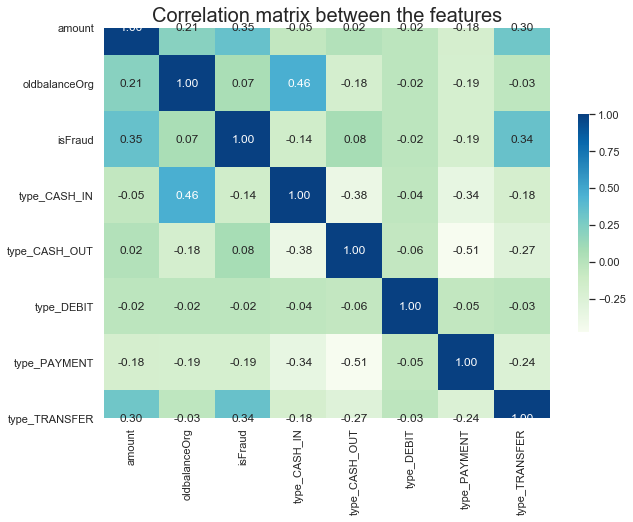

In [10]:
plot_corr()

In [11]:
X = data.loc[:, data.columns != 'isFraud'].values
y = data.loc[:, 'isFraud'].values

y=y.astype('int') # не совсем понял, почему https://stackoverflow.com/questions/45346550/valueerror-unknown-label-type-unknown

from sklearn.model_selection import train_test_split as train

X_train, X_test, y_train, y_test = train(X, y, shuffle=False)

from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=110, n_jobs=-1)
modExec()


RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23790
           1       0.98      0.98      0.98      4334

    accuracy                           0.99     28124
   macro avg       0.99      0.99      0.99     28124
weighted avg       0.99      0.99      0.99     28124

[[23715    75]
 [   83  4251]]


## Данные после исследования признаков

In [12]:
import numpy as np
from pandas import read_csv as read
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt

path = "newFilt.csv"
data = read(path, delimiter=",")

data.drop('isFlaggedFraud', axis=1, inplace=True)
data.drop('nameOrig', axis=1, inplace=True)
data.drop('nameDest', axis=1, inplace=True)
data.drop('oldbalanceDest', axis=1, inplace=True)
data.drop('step', axis=1, inplace=True)
data.drop('newbalanceOrig', axis=1, inplace=True)
data.drop('newbalanceDest', axis=1, inplace=True)

data = pd.get_dummies(data)
data.head()

,amount,oldbalanceOrg,isFraud,hour,newSender,newReceiver,merchant,fraudsEarly,LTS,LTR,IZoB,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.00,0,1,1,1,1,0,0,0,0,0,0,0,1,0
1,181.00,181.00,1,1,1,1,0,0,0,0,1,0,0,0,0,1
2,181.00,181.00,1,1,1,1,0,0,0,0,1,0,1,0,0,0
3,9478.39,116494.00,0,1,1,1,1,0,0,0,0,0,0,0,1,0
4,3454.08,9031.96,0,1,1,1,1,0,0,0,0,0,0,0,1,0


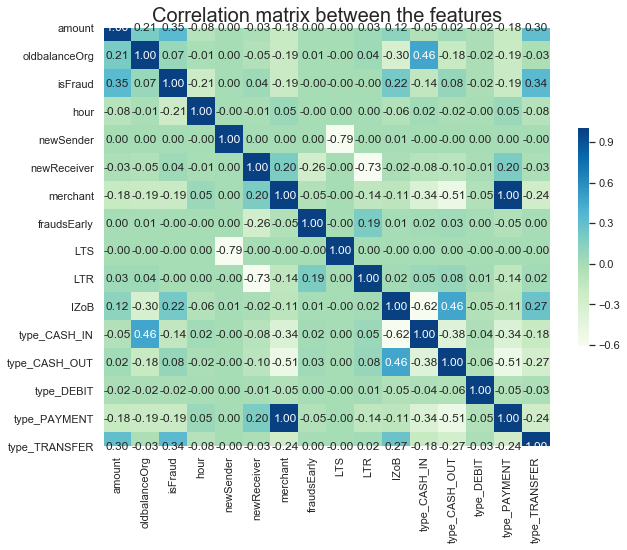

In [13]:
plot_corr()

In [14]:
X = data.loc[:, data.columns != 'isFraud'].values
y = data.loc[:, 'isFraud'].values

y=y.astype('int') # не совсем понял, почему https://stackoverflow.com/questions/45346550/valueerror-unknown-label-type-unknown

from sklearn.model_selection import train_test_split as train

X_train, X_test, y_train, y_test = train(X, y, shuffle=False)

from sklearn import metrics

### Рандомный лес

In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=110, n_jobs=-1)

modExec()

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     23790
           1       0.99      0.96      0.97      4334

    accuracy                           0.99     28124
   macro avg       0.99      0.98      0.98     28124
weighted avg       0.99      0.99      0.99     28124

[[23728    62]
 [  186  4148]]


### Решающее дерево

In [16]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

modExec()

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     23790
           1       0.99      0.97      0.98      4334

    accuracy                           0.99     28124
   macro avg       0.99      0.98      0.99     28124
weighted avg       0.99      0.99      0.99     28124

[[23740    50]
 [  134  4200]]


### К соседей

In [17]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

modExec()

KNeighborsClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23790
           1       0.98      0.99      0.98      4334

    accuracy                           0.99     28124
   macro avg       0.99      0.99      0.99     28124
weighted avg       0.99      0.99      0.99     28124

[[23683   107]
 [   59  4275]]


### ГаусианНБ

In [18]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

modExec()

GaussianNB
              precision    recall  f1-score   support

           0       0.87      0.99      0.93     23790
           1       0.86      0.19      0.32      4334

    accuracy                           0.87     28124
   macro avg       0.86      0.59      0.62     28124
weighted avg       0.87      0.87      0.83     28124

[[23652   138]
 [ 3497   837]]


### Градиентный  бустинг

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(max_depth=4)

modExec()

GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     23790
           1       0.99      0.93      0.96      4334

    accuracy                           0.99     28124
   macro avg       0.99      0.96      0.97     28124
weighted avg       0.99      0.99      0.99     28124

[[23737    53]
 [  307  4027]]
